In [1]:
from gwdip import *

# List of sensitivity files, ET in triangular configuration, 2 CE
O5_list=['asd/ET_sens.txt','asd/ET_sens.txt','asd/ET_sens.txt','asd/ce_strain.txt','asd/ce_strain.txt']
num_detectors=len(O5_list)
interp=fit_PSD_factor(O5_list,10,2048) # Perform the interpolation for the sensitivity

Nsamp=100000 # Number of GW signals to simulate per loop
Ndet=10000000 # Total number of GW signals you want

# CMB dipole from https://arxiv.org/pdf/2111.03616.pdf
dipole_magnitude,snr_thr,binary_type=0.00123358862*5,9.,'BBH'

# Initialize the redhsift and mass distributions for BBHs
zp=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=20.),'madau',{'gamma':2.7,'kappa':3.0,'zp':2.0})
mp=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',{'alpha':3.4,'beta':1.1,'mmax':87.,'mmin':5.1,'delta_m':4.8,'sigma_g':3.6,'mu_g':34.
                                                          ,'lambda_peak':0.03})

# Calculates the detected events
bin_det,Ngen=loop_detections(zp,mp,Nsamp,Ndet,interp,num_detectors,dipole_magnitude,snr_thr,binary_type)
bin_det['dipole_magnitude'],bin_det['Ngen']=dipole_magnitude,Ngen

/home/smastro/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
  return _np.nan_to_num(10.**_splev(_np.log10(z),self.interp_dvc_dz,ext=0))
/home/smastro/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/home/smastro/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/home/smastro/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/home/smastro/git_repositories/cos

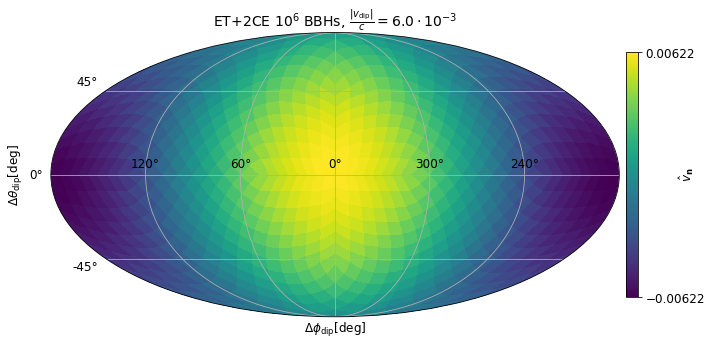

In [2]:
# Caculate e plot the dipole estimator
vc_map,theta,phi,hh=vc_estimator_map(bin_det['phi'][:int(1e6):],bin_det['theta'][:int(1e6):],8,8)

projview(
    vc_map,
    coord=["E"],
    graticule=True,
    rot=[0,90,0],
    graticule_labels=True,
    unit=r"$\hat{v}_{\mathbf{n}}$",
    xlabel=r'$\Delta \phi_{\rm dip}$[deg]',
    ylabel=r'$\Delta \theta_{\rm dip}$[deg]',
    cb_orientation="vertical",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title=r'ET+2CE $10^6$ BBHs, $\frac{|v_{\rm dip}|}{c}=6.0 \cdot 10^{-3}$',
);



In [3]:
# Initialize the likelihood for the smpling
likelihood=hierarchical_likelihood(bin_det['phi'][:int(1e6):],bin_det['theta'][:int(1e6):],8,8)

# Variables to sample
priors={'phi_dipole':bilby.core.prior.Uniform(0,2*np.pi),
       'theta_dipole':bilby.core.prior.Sine(),
       'Nmono':bilby.core.prior.LogUniform(1e5,1e8),
       'vocalpha':bilby.core.prior.LogUniform(1e-6,1e-1)} # Note, if you want to sample for the monopole, just put this 'vocalpha':0


res=bilby.sampler.run_sampler(likelihood=likelihood,priors=priors,outdir='AGN_sampling')


13:55 bilby INFO    : Running for label 'label', output will be saved to 'AGN_sampling'
13:55 bilby INFO    : Search parameters:
13:55 bilby INFO    :   phi_dipole = Uniform(minimum=0, maximum=6.283185307179586, name=None, latex_label=None, unit=None, boundary=None)
13:55 bilby INFO    :   theta_dipole = Sine(minimum=0, maximum=3.141592653589793, name=None, latex_label=None, unit=None, boundary=None)
13:55 bilby INFO    :   Nmono = LogUniform(minimum=100000.0, maximum=100000000.0, name=None, latex_label=None, unit=None, boundary=None)
13:55 bilby INFO    :   vocalpha = LogUniform(minimum=1e-06, maximum=0.1, name=None, latex_label=None, unit=None, boundary=None)
13:55 bilby INFO    : Single likelihood evaluation took 1.089e-04 s


0it [00:00, ?it/s]

13:55 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fa7b4a8b6a0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
13:55 bilby INFO    : Checkpoint every check_point_delta_t = 600s
13:55 bilby INFO    : Using dynesty version 1.0.1
13:55 bilby INFO    : Using the bilby-implemented rwalk sa

14:04 bilby INFO    : Sampling time: 0:08:07.777690
14:04 bilby INFO    : Summary of results:
nsamples: 19483
ln_noise_evidence:    nan
ln_evidence: 6171730.539 +/-  0.162
ln_bayes_factor:    nan +/-  0.162



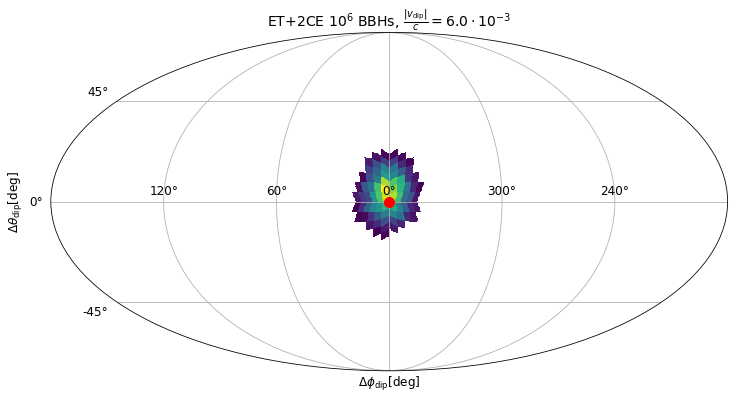

In [4]:
# Finds the 90% contour of the dipole direction
hh=find_quantity_histo(res.posterior['phi_dipole'].to_numpy(),res.posterior['theta_dipole'].to_numpy(),16)

idxsorted=np.argsort(hh)[::-1]
hcum=np.cumsum(hh[idxsorted])/np.sum(hh)
idxcum=np.where(hcum>=0.9)[0][0]
idxtotake=idxsorted[idxcum+1::]
hh[idxtotake]=hp.UNSEEN
hh=hp.ma(hh)

projview(
    hh,
    coord=["E"],
    graticule=True,
    rot=[0,90,0],
    graticule_labels=True,
    xlabel=r'$\Delta \phi_{\rm dip}$[deg]',
    ylabel=r'$\Delta \theta_{\rm dip}$[deg]',
    cb_orientation="vertical",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title=r'ET+2CE $10^6$ BBHs, $\frac{|v_{\rm dip}|}{c}=6.0 \cdot 10^{-3}$',
    cbar=False
);

newprojplot(theta=np.pi/2, phi=0., marker="o", color="r", markersize=10)

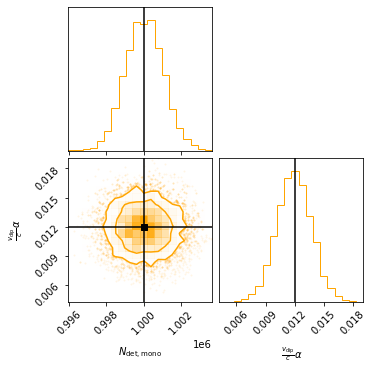

In [6]:
import corner 

# Plots the marginals of the detections due to the monopole and alpha v/c
figure=corner.corner(np.column_stack([res.posterior['Nmono'],res.posterior['vocalpha']]),labels=[r'$N_{\rm det, mono}$',r'$\frac{v_{\rm dip}}{c}\alpha$'],
                truths=[1e6,6.0e-3*2],color='orange',levels=[0.68,0.90],truth_color='k',)

for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=10)
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
 